In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# print all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"{var}: shape = {dataset.variables[var].shape}")

size: shape = (9, 4)
location_x: shape = (9, 4)
location_y: shape = (9, 4)
location_z: shape = (9, 4)


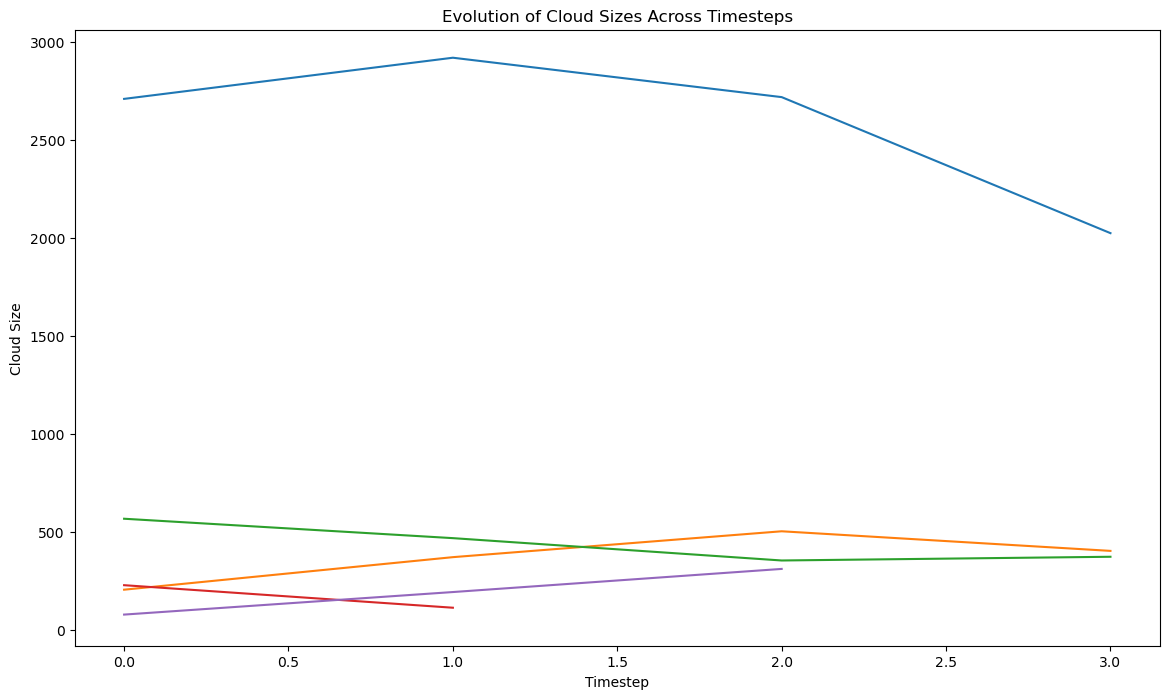

[[2708.0 204.0 566.0 227.0 77.0 98.0 360.0 61.0 333.0]
 [2918.0 370.0 467.0 112.0 192.0 -- -- -- --]
 [2717.0 502.0 353.0 -- 310.0 -- -- -- --]
 [2023.0 402.0 372.0 -- -- -- -- -- --]]


In [18]:
# Load the NetCDF file
  # Adjust the path accordingly
dataset = Dataset(nc_file, 'r')

# Read cloud sizes, assuming variable name is 'size' with dimensions ('cloud', 'timestep')
cloud_sizes = dataset.variables['size'][:].T  # Transpose if necessary to match ('timestep', 'cloud')

# Number of timesteps and clouds
num_timesteps = cloud_sizes.shape[0]
num_clouds = cloud_sizes.shape[1]

# Generate a plot for each cloud
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Extract size evolution for this cloud
    size_evolution = cloud_sizes[:, cloud_idx]
    
    # Plot the evolution
    plt.plot(range(num_timesteps), size_evolution, label=f'Cloud {cloud_idx+1}')

plt.xlabel('Timestep')
plt.ylabel('Cloud Size')
plt.title('Evolution of Cloud Sizes Across Timesteps')
#plt.legend()
plt.show()

# Close the dataset after use
dataset.close()

print (cloud_sizes)

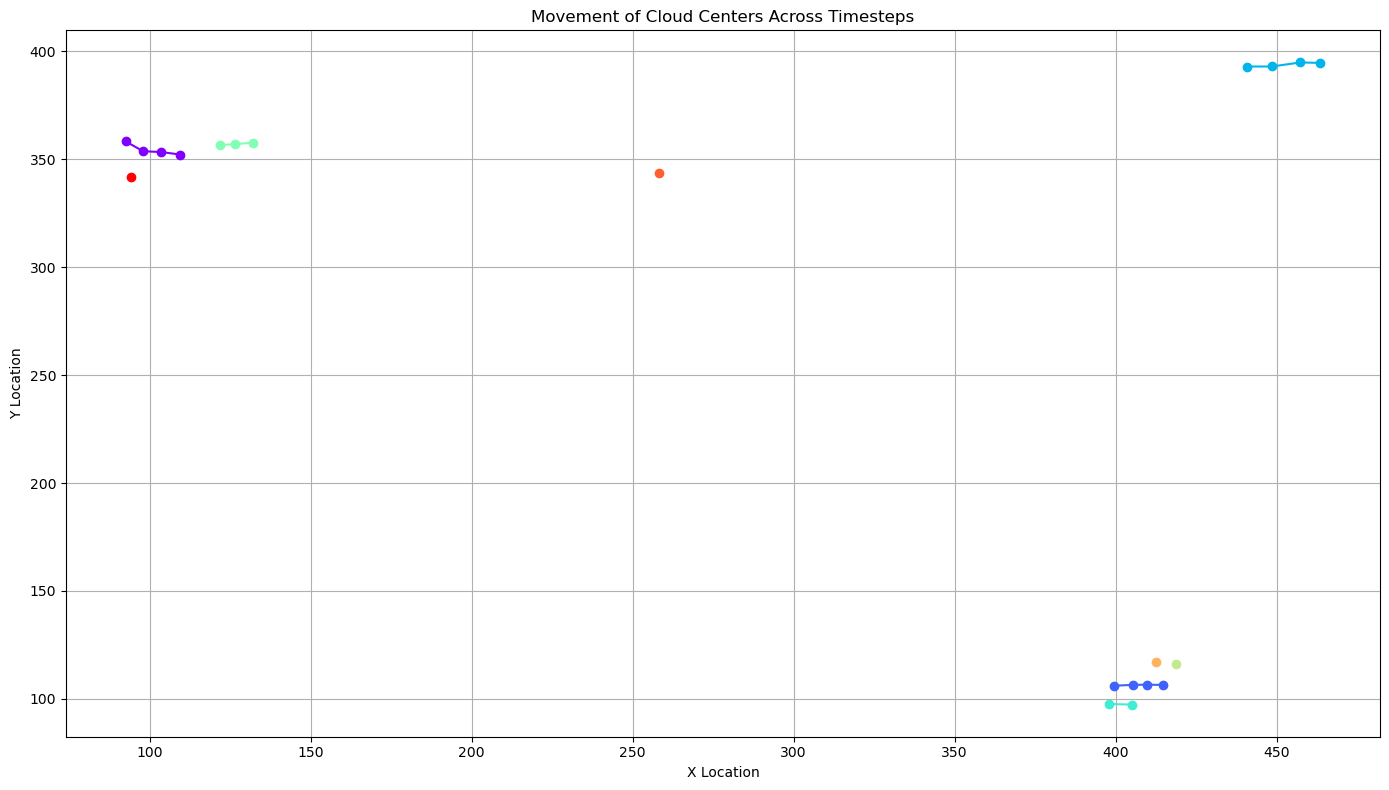

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path to your actual NetCDF file location
dataset = Dataset(nc_file, 'r')

# Reading cloud center locations with correct dimensions
x_centers = dataset.variables['location_x'][:]  # shape should now be (clouds, timesteps)
y_centers = dataset.variables['location_y'][:]  # shape should now be (clouds, timesteps)

# Number of clouds and timesteps
num_clouds, num_timesteps = x_centers.shape

# Generate a color map for clouds
colors = cm.rainbow(np.linspace(0, 1, num_clouds))

# Plot for cloud center movements
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Filter out NaN values for x and y centers
    valid_idx = ~np.isnan(x_centers[cloud_idx, :]) & ~np.isnan(y_centers[cloud_idx, :])
    if np.any(valid_idx):  # Check if there are any valid points to plot for this cloud
        plt.plot(x_centers[cloud_idx, valid_idx], y_centers[cloud_idx, valid_idx], '-o', color=colors[cloud_idx], label=f'Cloud {cloud_idx+1}')

plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.title('Movement of Cloud Centers Across Timesteps')
plt.grid(True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Close the dataset after use
dataset.close()
